<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


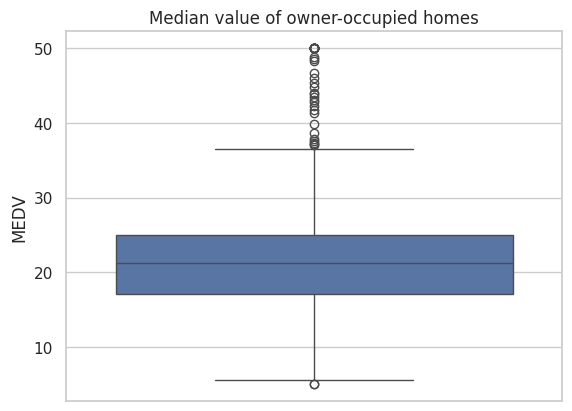

In [26]:
sns.boxplot(y="MEDV", data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

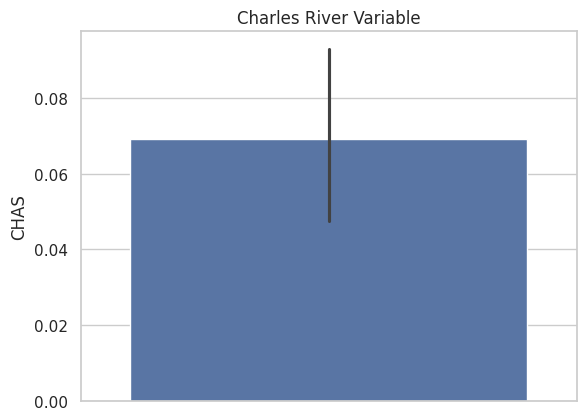

In [25]:
sns.barplot(y="CHAS", data=boston_df)
plt.title('Charles River Variable')
plt.show()

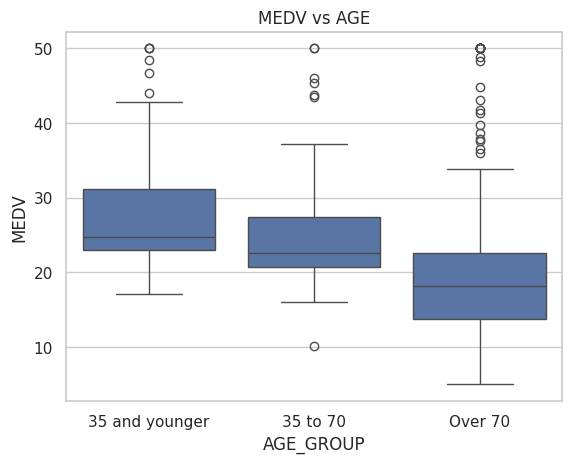

In [27]:
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 and younger', '35 to 70', 'Over 70']
)

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE')
plt.show()

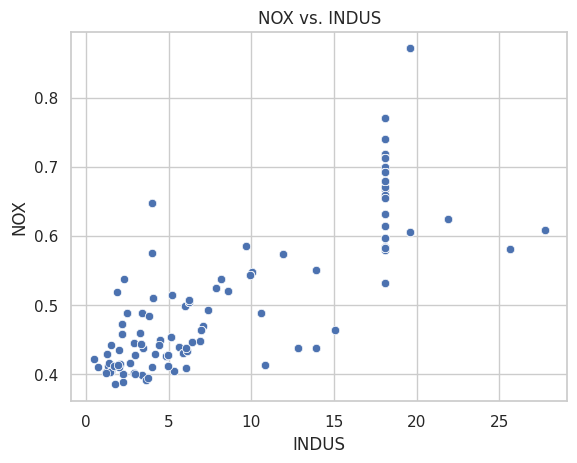

In [24]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('NOX vs. INDUS')
plt.show()

In [ ]:
##As INDUS increases, the NOX concentration also increases.
##This suggests that towns with more industrial-ness generally have higher air pollution levels (specifically nitric oxide).

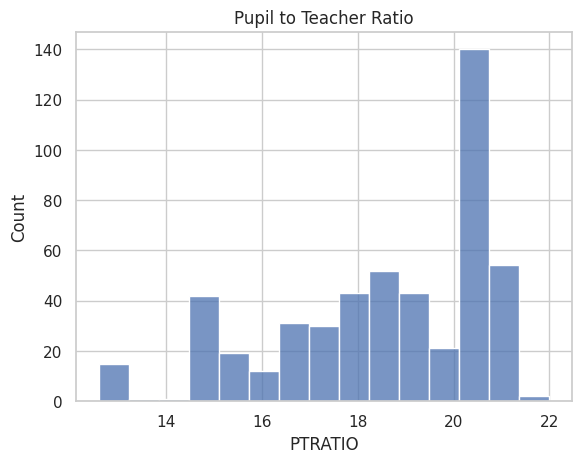

In [29]:
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)
plt.title('Pupil to Teacher Ratio')
plt.show()

In [31]:
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(river_yes, river_no, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


In [ ]:
##Homes located next to the Charles River tend to have higher median values compared to those not next to the river.

In [34]:
from scipy.stats import f_oneway

boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 and younger', '35 to 70', 'Over 70']
)

group1 = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '35 to 70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == 'Over 70']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [35]:
mean_medv_by_age_group = boston_df.groupby('AGE_GROUP')['MEDV'].mean()
print(mean_medv_by_age_group)

<ipython-input-35-ea7930ac6cdc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_medv_by_age_group = boston_df.groupby('AGE_GROUP')['MEDV'].mean()


AGE_GROUP
35 and younger    27.775824
35 to 70          24.947656
Over 70           19.793380
Name: MEDV, dtype: float64


In [37]:
##The age of housing in a neighborhood does have a strong effect on home prices.
##35 and younger has a higher mean, which means newer homes have a higher median value.

In [38]:
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("Pearson Correlation between NOX and INDUS:", correlation)

Pearson Correlation between NOX and INDUS: 0.763651446920914


In [ ]:
##A correlation of 0.76 means that there is a positive linear relationship between NOX and INDUS
##The proportion of non-retail business acres increases, the concentration of nitric oxides tends to increase as well.

In [39]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        02:42:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
##The distance to employment centers has a negative relationship with the median value of homes.
##As the distance from employment centers increases, the value of homes tends to decrease.